In [1]:
import numpy as np
import pandas as pd
from collections import Counter
from random import shuffle

In [2]:
train_data = np.load('lat_data/training_data_lat.npy', allow_pickle=True)

df = pd.DataFrame(train_data)
print(Counter(df[1].apply(str)))
df.head()

Counter({'[0, 0, 1]': 16506, '[1, 0, 0]': 778, '[0, 1, 0]': 279})


,0,1
0,"[[[65, 63, 60], [65, 63, 60], [65, 63, 60], [6...","[0, 0, 1]"
1,"[[[65, 63, 60], [65, 63, 60], [65, 63, 60], [6...","[0, 0, 1]"
2,"[[[65, 63, 60], [65, 63, 60], [65, 63, 60], [6...","[0, 0, 1]"
3,"[[[65, 63, 60], [65, 63, 60], [65, 63, 60], [6...","[0, 0, 1]"
4,"[[[65, 63, 60], [65, 63, 60], [65, 63, 60], [6...","[0, 0, 1]"


In [3]:
A, D, NK = [], [], []
shuffle(train_data)

In [4]:
for data in train_data:
    img = data[0]
    choice = data[1]
    # print(choice)
    if choice == [1, 0, 0]:
        A.append([img, choice])
        # print("A")
    elif choice == [0, 1, 0]:
        D.append([img, choice])
        # print("D")
    else:
        NK.append([img, choice])
        # print("NK")

<BarContainer object of 3 artists>

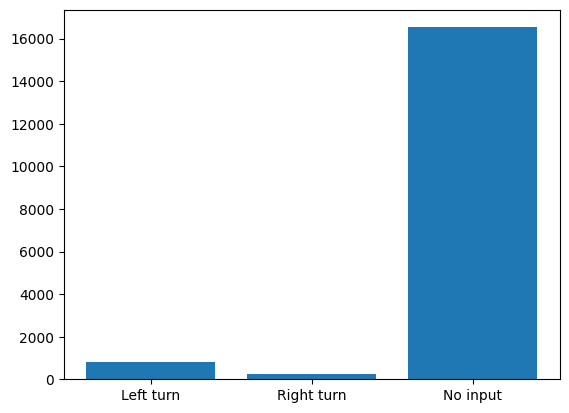

In [5]:
import matplotlib.pyplot as plt
plt.bar(['Left turn', 'Right turn', 'No input'], [len(A), len(D), len(NK)])

In [6]:
A = A[:len(D)][:len(NK)]
D = D[:len(A)][:len(NK)]
NK = NK[:len(A)][:len(D)]

<BarContainer object of 3 artists>

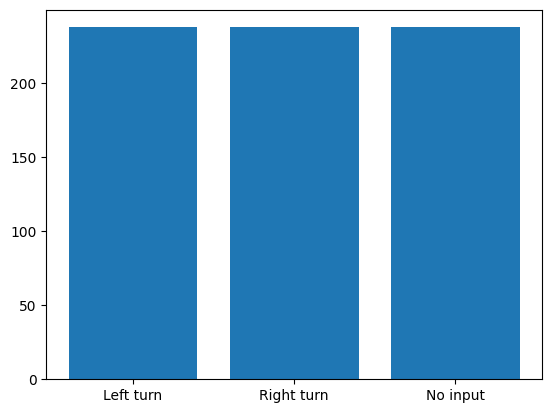

In [7]:
#make a bar plot
import matplotlib.pyplot as plt
plt.bar(['Left turn', 'Right turn', 'No input'], [len(A), len(D), len(NK)])

In [22]:
final_data = A + D + NK
shuffle(final_data)
print(len(final_data))
print(final_data[1][1])

633
[0, 1, 0]


In [23]:
new_df = pd.DataFrame(final_data)
new_df.head()

,0,1
0,"[[[65, 63, 60], [65, 63, 60], [65, 63, 60], [6...","[0, 1, 0]"
1,"[[[65, 63, 60], [65, 63, 60], [65, 63, 60], [6...","[0, 1, 0]"
2,"[[[65, 63, 60], [65, 63, 60], [65, 63, 60], [6...","[0, 1, 0]"
3,"[[[65, 63, 60], [65, 63, 60], [65, 63, 60], [6...","[0, 0, 1]"
4,"[[[65, 63, 60], [65, 63, 60], [65, 63, 60], [6...","[0, 0, 1]"


In [24]:
new_df.to_csv("lat_data/newdf.csv")

In [25]:
print(Counter(new_df[1].apply(str)))

Counter({'[0, 1, 0]': 211, '[0, 0, 1]': 211, '[1, 0, 0]': 211})


In [26]:
dfnp = new_df.to_numpy()
np.save('lat_data/balanced_new.npy', dfnp)